In [1]:
from si import *
import pickle
import boost_histogram as bh

from matplotlib import pyplot as plt
from iminuit import Minuit
import iminuit

Not a jupyter notebook. Not enabling notebook functions.
Welcome to JupyROOT 6.22/00
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


/home/jlab/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
infile = "../root_import/data/test2_clustersAndCoincidences_corrected_[['y', 2100, 2200]].pickle"
input_hist = pickle.load(open(infile,"rb"))['clustersAndCoincidences/corrected']

print(type(input_hist))

<class 'boost_histogram.Histogram'>


/home/jlab/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ResourceWarning: unclosed file <_io.BufferedReader name="../root_import/data/test2_clustersAndCoincidences_corrected_[['y', 2100, 2200]].pickle">
  


In [3]:
print((input_hist.axes[0].centers))

[7.45950554e-02 2.23785166e-01 3.72975277e-01 ... 6.99627025e+02
 6.99776215e+02 6.99925405e+02]


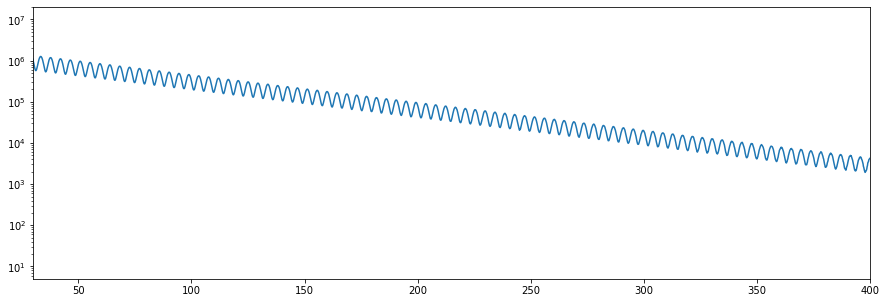

In [4]:
fig,ax = plt.subplots(figsize=(15,5))
plt.plot(input_hist.axes[0].centers, input_hist.view().value)
plt.yscale("log")
plt.xlim(30,400)
plt.show()

In [24]:
xlims = [30,300]
binlims = [input_hist.axes[0].index(x) for x in xlims]
print(xlims, "->",binlims)

x = input_hist.axes[0].centers[binlims[0]:binlims[1]]
y = input_hist.view().value[binlims[0]:binlims[1]]
yerr = input_hist.view().variance[binlims[0]:binlims[1]]

[30, 300] -> [201, 2010]


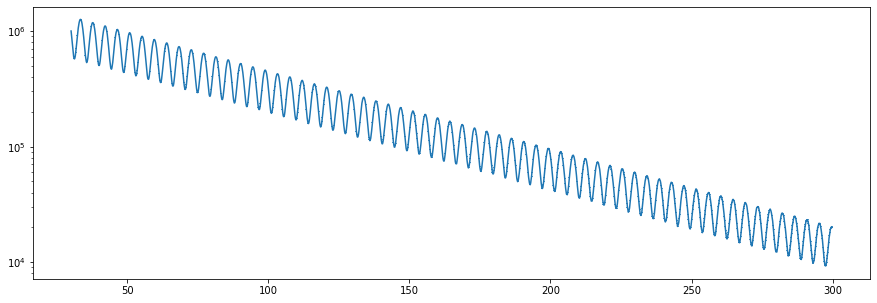

In [26]:
fig,ax = plt.subplots(figsize=(15,5))
plt.errorbar(x,y,yerr=yerr)
plt.yscale("log")
plt.show()

In [5]:
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def blinded_wiggle(x, p):
#     p = x
    norm  = p[0]
    life  = p[1]
    asym  = p[2]
    R     = p[3]
    phi   = p[4]
    
    time  = x
    omega = getBlinded.paramToFreq(R)
#    omega = myBlinder.paramToFreq(R) unblind version

    print("x:",x)
    print("p:", p)
    
    return norm * np.exp(-time/life) * (1 - asym*np.cos(omega*time + phi))

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [27]:
from  iminuit.cost import LeastSquares
cost = LeastSquares(x,y,yerr, blinded_wiggle, verbose=1)

In [28]:
cost([1000000,64,0.33,0,0])

x: [ 30.06180733  30.21099744  30.36018755 ... 299.49914749 299.6483376
 299.79752771]
p: [1000000, 64, 0.33, 0, 0]
([1000000, 64, 0.33, 0, 0],) -> 60954694.914599


60954694.914599

In [29]:
# params={'norm':10000,
#        'tau':64,
#        'A':0.33,
#        'R':0,
#        'phi':0}
# m = Minuit(cost, errordef=1)
m = Minuit.from_array_func( cost, start=[1090000,64.4,0.33,0,-1.2], 
                               name=['N', 'tau', 'A', 'R', 'phi'], errordef=1)
m.params

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | N    |  1.090e6  |  0.011e6  |            |            |         |         |       |
| 1 | tau  |   64.4    |    0.6    |            |            |         |         |       |
| 2 | A    |  0.3300   |  0.0033   |            |            |         |         |       |
| 3 | R    |    0.0    |    0.1    |            |            |         |         |       |
| 4 | phi  |  -1.200   |  -0.012   |            |            |         |         |       |
------------------------------------------------------------------------------------------

In [30]:
m.migrad()

x: [ 30.06180733  30.21099744  30.36018755 ... 299.49914749 299.6483376
 299.79752771]
p: [ 1.09e+06  6.44e+01  3.30e-01  0.00e+00 -1.20e+00]
(array([ 1.09e+06,  6.44e+01,  3.30e-01,  0.00e+00, -1.20e+00]),) -> 34591782.29535743
x: [ 30.06180733  30.21099744  30.36018755 ... 299.49914749 299.6483376
 299.79752771]
p: [ 1.1009e+06  6.4400e+01  3.3000e-01  0.0000e+00 -1.2000e+00]
(array([ 1.1009e+06,  6.4400e+01,  3.3000e-01,  0.0000e+00, -1.2000e+00]),) -> 32971397.227957983
x: [ 30.06180733  30.21099744  30.36018755 ... 299.49914749 299.6483376
 299.79752771]
p: [ 1.0791e+06  6.4400e+01  3.3000e-01  0.0000e+00 -1.2000e+00]
(array([ 1.0791e+06,  6.4400e+01,  3.3000e-01,  0.0000e+00, -1.2000e+00]),) -> 36253744.09329897
x: [ 30.06180733  30.21099744  30.36018755 ... 299.49914749 299.6483376
 299.79752771]
p: [ 1.09109e+06  6.44000e+01  3.30000e-01  0.00000e+00 -1.20000e+00]
(array([ 1.09109e+06,  6.44000e+01,  3.30000e-01,  0.00000e+00,
       -1.20000e+00]),) -> 34427872.8357431
x: [ 30

------------------------------------------------------------------
| FCN = 3007                    |     Ncalls=169 (169 total)     |
| EDM = 0.000177 (Goal: 0.0002) |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | N    | 1.52933e6 | 0.00015e6 |            |            |         |         |       |
| 1 | tau  |  64.417   |   0.004   |            |            |         |         |       |
| 2 | A    | 390.58e-3 |  0.07e-3  |            |            |         |         |       |
| 3 | R    |   -45.5   |    2.2    |            |            |         |         |       |
| 4 | phi  |-973.65e-3 |  0.34e-3  |            |            |         |         |       |
------------------------------------------------------------------------------------------

In [31]:
m.values[:]

[1529329.3686204015,
 64.41749396878777,
 0.39057870654714383,
 -45.505747193127135,
 -0.9736458804518081]

x: [ 30.06180733  30.21099744  30.36018755 ... 299.49914749 299.6483376
 299.79752771]
p: [1529329.3686204015, 64.41749396878777, 0.39057870654714383, -45.505747193127135, -0.9736458804518081]


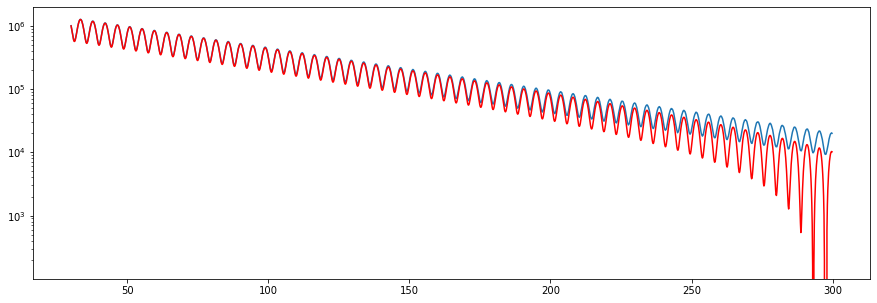

In [40]:
fig,ax = plt.subplots(figsize=(15,5))
plt.plot(x,y)

plt.plot(x, blinded_wiggle(x, m.values[:])-10000, color="red"); # trick to access values as a tuple

plt.yscale("log")
# plt.xlim(30,40)
plt.show()